In [2]:
    import os
    
    import pandas as  pd
    import spacy
    
    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob
    
    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    
    
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer
    
    import swifter

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sunpriya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sunpriya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sunpriya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sunpriya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [4]:
df = pd.read_csv(".\dataset\ValidationSet.csv")

<AxesSubplot: >

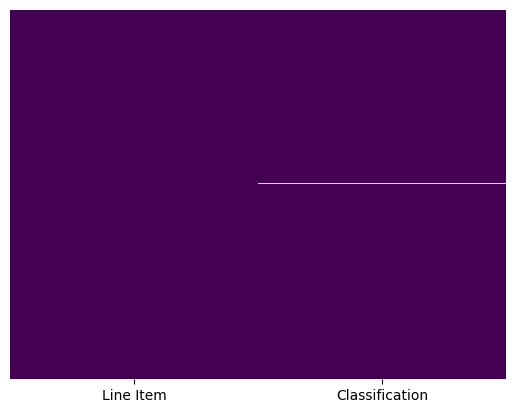

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot: >

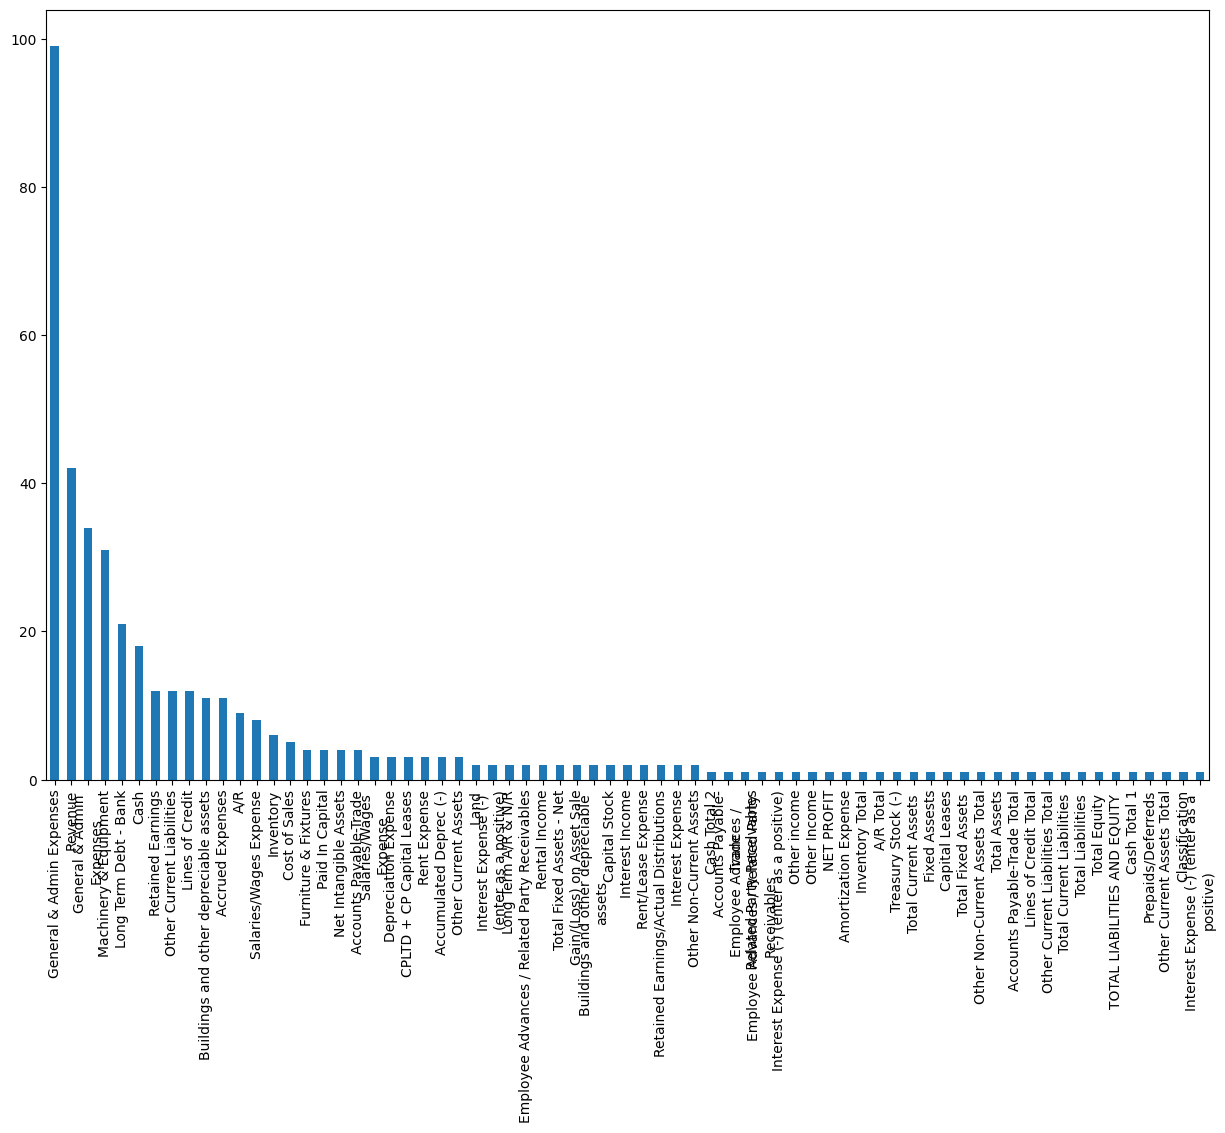

In [6]:
df['Classification'].value_counts().plot( kind='bar', figsize=(15,10))

In [7]:
df.columns

Index(['Line Item', 'Classification'], dtype='object')

In [8]:
df.describe

<bound method NDFrame.describe of                                            Line Item            Classification
0                                              Cash                       Cash
1                                        Petty Cash                       Cash
2                                TD-operations 9798                       Cash
3                                   TD-Payroll 3859                       Cash
4                                   TD-Savings 9814                       Cash
..                                               ...                       ...
419                            Other Fringe Benefits  General & Admin Expenses
420                                        Utilities  General & Admin Expenses
421                                   COVID Expenses  General & Admin Expenses
422  Contingency Fund\nIdentified Expense Reductions  General & Admin Expenses
423                                     Depreciation      Depreciation Expense

[424 rows x 2 col

In [9]:
df.isna().sum()


Line Item         0
Classification    1
dtype: int64

In [10]:
df['Classification'].unique()

array(['Cash', 'Cash Total 1', 'Cash Total 2', 'A/R', 'A/R Total',
       'Inventory', 'Inventory Total', 'Other Current Assets Total',
       'Total Current Assets ', 'Fixed Assests', 'Machinery & Equipment',
       'Furniture & Fixtures', 'Capital Leases', 'Total Fixed Assets ',
       'Other Non-Current Assets', 'Other Non-Current Assets Total',
       'Total Assets', 'Accounts Payable-Trade',
       'Accounts Payable-Trade Total', 'Lines of Credit',
       'Lines of Credit Total', 'Other Current Liabilities',
       'Other Current Liabilities Total', 'Total Current Liabilities ',
       'Total Liabilities ', 'Capital Stock', 'Paid In Capital',
       'Retained Earnings', 'Total Equity ',
       'TOTAL LIABILITIES AND EQUITY ', 'Land', 'Net Intangible Assets',
       'Accumulated Deprec (-)', 'CPLTD + CP Capital Leases',
       'Long Term Debt - Bank', 'Prepaids/Deferreds',
       'Long Term A/R & N/R', 'Total Fixed Assets - Net',
       'Other Current Assets', 'Accrued Expenses', '

In [11]:
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()
my_sw = ['make', 'amp',  'news','new' ,'time', 'u','s', 'photos',  'get', 'say']

def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2 and token not in my_sw
  
def clean_txt(text):
    clean_text = []
    clean_text2 = []
    text = re.sub("'", "",text)
    text=re.sub("(\\d|\\W)+"," ",text)    
    clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
    clean_text2 = [word for word in clean_text if black_txt(word)]
    return " ".join(clean_text2)

In [12]:
def subj_txt(text):
    return  TextBlob(text).sentiment[1]

def polarity_txt(text):
    return TextBlob(text).sentiment[0]

def len_text(text):
    if len(text.split())>0:
         return len(set(clean_txt(text).split()))/ len(text.split())
    else:
         return 0

In [13]:
X = df['Line Item']
y =df['Classification']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
v = dict(zip(list(y), df['Classification'].to_list()))

In [14]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', MultinomialNB(alpha=.01)),
... ])

In [15]:
text_clf.fit(x_train.to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [16]:
import numpy as np


In [17]:
X_TEST = x_test.to_list()
Y_TEST = list(y_test)

In [18]:
predicted = text_clf.predict(X_TEST)

In [19]:
c = 0

for doc, Classification in zip(X_TEST, predicted):
    
    if c == 5:break
    
    print("-"*55)
    print(doc)
    print(v[Classification])
    print("-"*55)

    c = c + 1 

-------------------------------------------------------
Purchases-Arcade
Machinery & Equipment
-------------------------------------------------------
-------------------------------------------------------
Mileage Reimbursement
General & Admin Expenses
-------------------------------------------------------
-------------------------------------------------------
Employee Advance
General & Admin 
Expenses
-------------------------------------------------------
-------------------------------------------------------
Rent
Revenue
-------------------------------------------------------
-------------------------------------------------------
Utilities
General & Admin Expenses
-------------------------------------------------------


In [20]:
np.mean(predicted == Y_TEST)

0.4823529411764706

In [21]:
docs_new = ['Buildings-Super Slick']

In [22]:
predicted = text_clf.predict(docs_new)

In [23]:
v[predicted[0]]

'Buildings and other depreciable assets'

In [24]:
import pickle
with open('model.pkl','wb') as f:
    pickle.dump(text_clf,f)

In [25]:
# load
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [26]:
docs_new = ['Rent']
predicted = clf2.predict(docs_new)

In [27]:
predicted[0]

57

In [28]:
type(v[predicted[0]])

str

In [29]:
import pickle
with open('dict.pkl','wb') as f:
    pickle.dump(v,f)